### Ames, Iowa Housing Analysis
### Rough Draft
# Please see final report for readability

In [118]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score # use for proj 2
from sklearn.metrics import r2_score
import missingno as msno
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [514]:
#import CSVs
train = pd.read_csv('datasets/train.csv')
final = pd.read_csv('datasets/test.csv')

In [155]:
def viewer(df):
    pd.set_option('display.max_columns', 85) #from Matt Burke
    view = pd.DataFrame()
    view['dtypes'] = df.dtypes
    view['nunique'] = df.nunique()
    view['nans'] = df.isna().sum()
    view['mean'] = df.mean().round(1)
    view['std dev'] = df.std().round(1)
    return view.T

In [662]:
train.shape

(2051, 90)

In [385]:
viewer(train)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,...,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,log lot area,heat qual ex,sfr,log gr liv,total sqft,kitch new,kitch bad
dtypes,int64,int64,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,float64,object,float64,float64,float64,object,object,...,int64,int64,float64,float64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,float64,float64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,int64,float64,int64,int64,float64,float64,int64,int64
nunique,2050,2050,16,7,118,1476,2,2,4,4,3,5,3,28,9,8,5,8,10,9,113,61,6,6,15,15,4,373,4,5,6,5,5,4,6,821,6,205,966,892,5,5,...,31,1053,4,3,5,3,8,4,4,14,8,5,5,6,100,3,6,514,5,5,3,321,223,159,22,100,10,4,4,5,28,12,5,9,827,1476,2,2,1053,1192,2,2
nans,0,0,0,0,330,0,0,1910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,22,0,0,0,55,55,58,55,1,56,1,1,0,0,0,...,0,0,2,2,0,0,0,0,0,0,0,0,999,113,113,113,0,0,113,113,0,0,0,0,0,0,0,2041,1651,1985,0,0,0,0,0,0,0,0,0,0,0,0
mean,1473.7,7.13494e+08,57,NaN,69.1,10065.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1,5.6,1971.7,1984.2,NaN,NaN,NaN,NaN,NaN,99.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.2,NaN,48,567.9,1057.6,NaN,NaN,...,5.5,1499.2,0.4,0.1,1.6,0.4,2.8,1,NaN,6.4,NaN,0.6,NaN,NaN,1978.7,NaN,1.8,473.7,NaN,NaN,NaN,93.8,47.6,22.5,2.6,16.5,2.4,NaN,NaN,NaN,51.6,6.2,2007.8,NaN,181485,9.1,0.5,0.8,7.3,2556.7,0,1
std dev,844,1.88688e+08,42.8,NaN,23.3,6744.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,1.1,30.2,21,NaN,NaN,NaN,NaN,NaN,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461.3,NaN,165,445,450,NaN,NaN,...,51.1,500.5,0.5,0.3,0.5,0.5,0.8,0.2,NaN,1.6,NaN,0.6,NaN,NaN,25.4,NaN,0.8,215.9,NaN,NaN,NaN,128.6,66.8,59.7,25.2,57.4,37.8,NaN,NaN,NaN,573.5,2.7,1.3,NaN,79275.1,0.5,0.5,0.4,0.3,811,0.1,0.1


In [632]:
#from Matt Burke from Stack Overflow
pd.set_option('display.max_columns', 85)
train.head(60)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,...,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,log lot area,heat qual ex,sfr,log gr liv,total sqft,bsmt,multifam,age,logprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,...,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,9.511703,1,1,7.299121,2204.0,0,0,34,11.779129
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,...,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,9.349406,1,1,7.660114,3035.0,0,0,13,12.301383
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,...,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,8.977399,0,1,6.963190,2114.0,0,0,57,11.599103
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,...,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,9.190342,0,1,7.275172,1828.0,0,0,4,12.066811
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,...,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500,9.563459,0,1,7.275865,2121.0,1,0,110,11.838626
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,...,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,190000,9.710631,1,1,7.543273,3405.0,0,0,44,12.154779
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,...,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,140000,8.209308,0,0,6.977281,1619.0,0,0,1,11.849398
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,...,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000,9.405907,0,1,7.080026,2376.0,0,0,51,11.863582
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldT

In [631]:
# log of price
train['logprice'] = np.log(train['SalePrice'])
# final['logprice'] = np.log(final['SalePrice'])

# explore natural log of lot area
train['log lot area'] = np.log(train['Lot Area'])
final['log lot area'] = np.log(final['Lot Area'])

#explore heat quality = excellent or not
train['heat qual ex'] = np.where(train['Heating QC']=='Ex', 1, 0)
final['heat qual ex'] = np.where(final['Heating QC']=='Ex', 1, 0)

#explore building type
train['sfr'] = np.where(train['Bldg Type'] == '1Fam', 1, 0)
final['sfr'] = np.where(final['Bldg Type'] == '1Fam', 1, 0)

#explore log of ground living area
train['log gr liv'] = np.log(train['Gr Liv Area'])
final['log gr liv'] = np.log(final['Gr Liv Area'])

#total sq ft
train.loc[train["Total Bsmt SF"].isnull(), 'Total Bsmt SF'] = 0
train['total sqft'] = train['Gr Liv Area'] + train['Total Bsmt SF']
final['total sqft'] = final['Gr Liv Area'] + final['Total Bsmt SF']

#bsmt qual
train['bsmt'] = np.where(train['Bsmt Qual'] == 'Fa', 1, 0)
final['bsmt'] = np.where(final['Bsmt Qual'] == 'Fa', 1, 0)

#multifamily?
train['multifam'] = np.where(train['Bldg Type'] == ('Duplex' or '2fmCon'), 1, 0)
final['multifam'] = np.where(final['Bldg Type'] == ('Duplex' or '2fmCon'), 1, 0)

#age of home
train['age'] = train['Yr Sold'] - train['Year Built']
final['age'] = final['Yr Sold'] - final['Year Built']

In [588]:
train.groupby('Sale Type').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,...,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,SalePrice,log lot area,heat qual ex,sfr,log gr liv,total sqft,bsmt,multifam
Sale Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
COD,63,63,63,63,48,63,63,9,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,62,62,62,62,63,62,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63,63,63,63,21,62,62,62,63,63,62,62,63,63,63,63,63,63,63,0,17,2,63,63,63,63,63,63,63,63,63,63,63
CWD,10,10,10,10,8,10,10,1,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,8,10,10,10,10,10,10,10,10,10,10,10,10,10,10,0,3,0,10,10,10,10,10,10,10,10,10,10,10
Con,4,4,4,4,4,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0,0,4,4,4,4,4,4,4,4,4,4,4
ConLD,17,17,17,17,16,17,17,3,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,12,12,12,12,16,12,16,16,17,17,17,...,17,17,17,16,16,17,17,17,17,17,17,17,17,1,15,15,15,17,17,15,15,17,17,17,17,17,17,17,0,3,0,17,17,17,17,17,17,17,17,17,17,17
ConLI,7,7,7,7,6,7,7,1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7,7,7,7,4,6,6,6,7,7,6,6,7,7,7,7,7,7,7,0,1,1,7,7,7,7,7,7,7,7,7,7,7
ConLw,5,5,5,5,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5,5,5,5,2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,0,0,5,5,5,5,5,5,5,5,5,5,5
New,160,160,160,160,158,160,160,11,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,149,149,160,160,160,160,160,159,160,160,160,160,160,160,160,160,...,160,160,160,160,160,160,160,160,160,160,160,160,160,105,158,158,158,160,160,158,158,160,160,160,160,160,160,160,1,0,1,160,160,160,160,160,160,160,160,160,160,160
Oth,4,4,4,4,3,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4,4,4,4,0,3,3,3,4,4,3,3,4,4,4,4,4,4,4,0,2,0,4,4,4,4,4,4,4,4,4,4,4
WD,1781,1781,1781,1781,1473,1781,1781,115,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1770,1770,1781,1781,1781,1732,1732,1730,1732,1781,1731,1781,1781,1781,1781,1781,...,1781,1781,1781,1780,1780,1781,1781,1781,1781,1781,1781,1781,1781,908,1675,1674,1674,1781,1780,1674,1674,1781,1781,1781,1781,1781,1781,1781,8,374,61,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781


In [637]:
train2 = train[train['Sale Type'] != 'COD']
train2 = train2[train2['Sale Type'] != 'CWD']
train2 = train2[train2['Sale Type'] != 'Con']
train2 = train2[train2['Sale Type'] != 'ConLD']
train2 = train2[train2['Sale Type'] != 'ConLI']
train2 = train2[train2['Sale Type'] != 'ConLw']
train2 = train2[train2['Sale Type'] != 'Oth']

In [613]:
train2.shape

(1941, 89)

In [549]:
train.groupby('Bldg Type').count()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,...,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,log lot area,heat qual ex,sfr,log gr liv,total sqft,bsmt,multifam
Bldg Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1Fam,1700,1700,1700,1700,1415,1700,1700,97,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1680,1680,1700,1700,1700,1668,1668,1665,1668,1699,1667,1699,1699,1700,1700,1700,1700,...,1700,1700,1698,1698,1700,1700,1700,1700,1700,1700,1700,1700,919,1632,1631,1631,1699,1699,1631,1631,1700,1700,1700,1700,1700,1700,1700,9,375,61,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700
2fmCon,46,46,46,46,44,46,46,11,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,44,44,44,44,46,44,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46,46,46,7,30,30,30,46,46,30,30,46,46,46,46,46,46,46,0,8,2,46,46,46,46,46,46,46,46,46,46,46,46
Duplex,75,75,75,75,63,75,75,2,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,55,55,55,55,75,55,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75,75,75,6,54,54,54,75,75,54,54,75,75,75,75,75,75,75,0,4,2,75,75,75,75,75,75,75,75,75,75,75,75
Twnhs,69,69,69,69,63,69,69,9,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69,69,69,17,62,62,62,69,69,62,62,69,69,69,69,69,69,69,0,8,0,69,69,69,69,69,69,69,69,69,69,69,69
TwnhsE,161,161,161,161,136,161,161,21,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,159,159,161,161,161,160,160,160,160,161,160,161,161,161,161,161,161,...,161,161,161,161,161,161,161,161,161,161,161,161,102,160,160,160,161,161,160,160,161,161,161,161,161,161,161,0,5,0,161,161,161,161,161,161,161,161,161,161,161,161


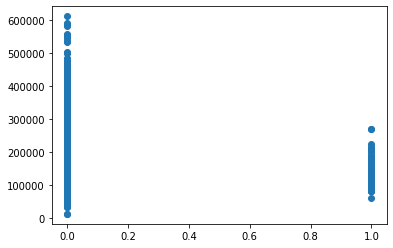

In [535]:
# kitch = train['kitch new'] == 'Ex'
plt.scatter(train['multifam'], train['SalePrice'])

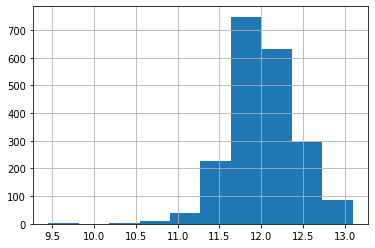

In [496]:
train['logprice'] = np.log(train['SalePrice'])
np.log(train['SalePrice']).hist();

(array([ 21., 192., 712., 525., 265., 159.,  85.,  38.,  24.,  16.]),
 array([ 12789. ,  60010.1, 107231.2, 154452.3, 201673.4, 248894.5,
        296115.6, 343336.7, 390557.8, 437778.9, 485000. ]),
 <a list of 10 Patch objects>)

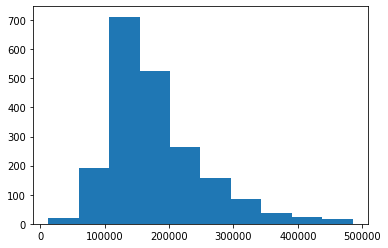

In [497]:
plt.hist(train['SalePrice'])

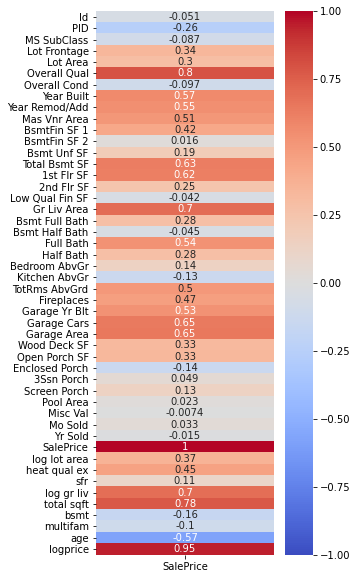

In [668]:
plt.figure(figsize=(4,10))
sns.heatmap(ftrain.corr()[['SalePrice']],
            annot=True,
            cmap='coolwarm',
           vmin=-1,
           vmax=1);

In [9]:
train.shape

(2051, 81)

# Cleaning
#### Since we have 81 columns, we'll try to target less useful columns and drop them.
#### This is real estate; location, location, location. Let's hold off on dropping columns that could predict location.

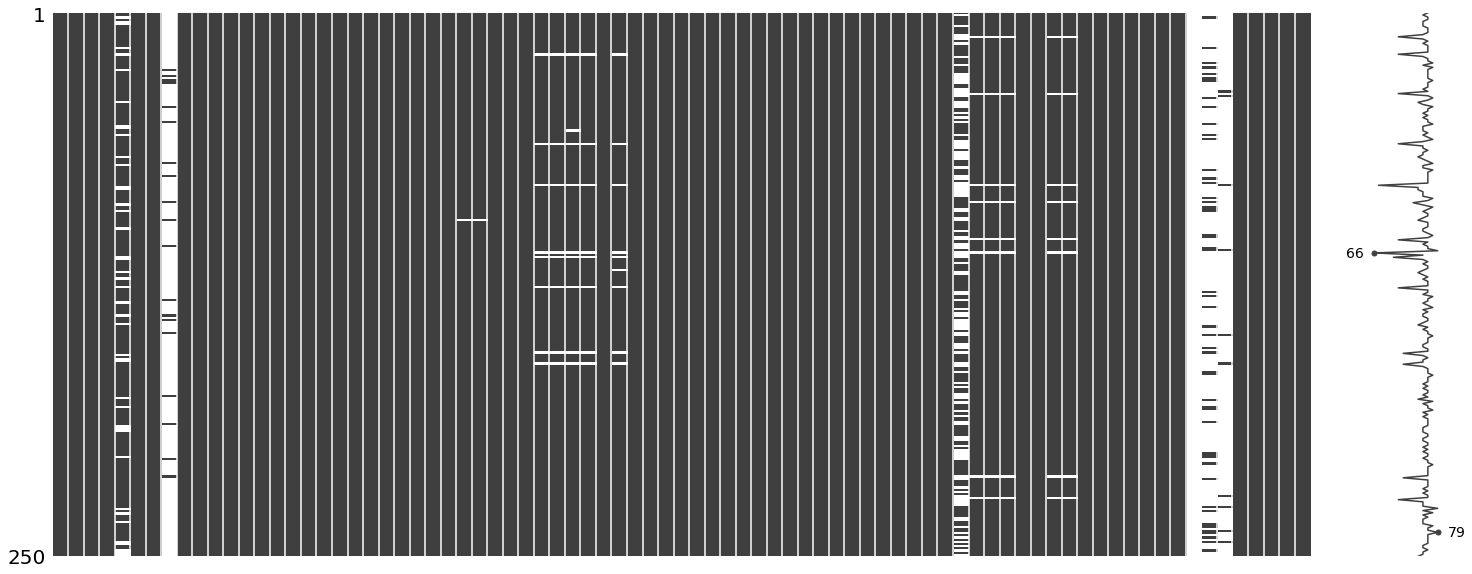

In [10]:
msno.matrix(train.sample(250));

One column towards the left and several on the right have enormous amounts of missing data. We should find and drop these.

In [571]:
#Set NaN in garage cars or garage area to 0
# train.drop(train[train["Garage Cars"].isnull()].index, inplace=True)
train.loc[train["Garage Area"].isnull(), 'Garage Cars'] = 0

In [12]:
train.dtypes.tail(5)

Misc Val      int64
Mo Sold       int64
Yr Sold       int64
Sale Type    object
SalePrice     int64
dtype: object

In [14]:
train['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [21]:
#Here we are checking for neighborhoods that appear in Test but do not appear in Train, and vice-versa
a = set(final['Neighborhood'])
b = set(train['Neighborhood'])
a.difference(b)

set()

In [22]:
b.difference(a)

{'GrnHill', 'Landmrk'}

# EDA

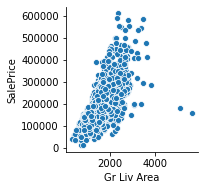

In [205]:
sns.pairplot(train_loc2, x_vars=['Gr Liv Area'], y_vars=['SalePrice'])

In [655]:
train3 = train2.loc[train2['SalePrice'] < 405_000]
train3 = train3.loc[train3['total sqft'] < 4912]
train3.shape

(1894, 90)

In [653]:
print(train2['total sqft'].median())
print(train2['total sqft'].std())
print(2473 + (813 * 3))

2473.0
813.9316796792322
4912


In [654]:
train2['total sqft'].sort_values().tail(20)

1020     4895.0
1647     4904.0
138      4918.0
823      4929.0
685      4948.0
786      4958.0
1939     4963.0
623      4984.0
1964     4998.0
30       5048.0
1700     5066.0
1692     5233.0
1117     5266.0
1389     5271.0
1164     5496.0
1897     5508.0
1227     5542.0
328      6428.0
1885    10190.0
960     11752.0
Name: total sqft, dtype: float64

In [457]:
# train2 = train.loc[train['SalePrice'] < 383_000]

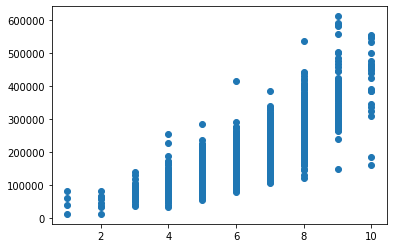

In [209]:
plt.scatter(train['Overall Qual'], train['SalePrice'])


In [537]:
train['SalePrice'].std()

79258.65935236562

In [541]:
train['SalePrice'].median()

162500.0

In [540]:
train['SalePrice'].median() + (3 * train['SalePrice'].std())

400275.9780570968

# Modeling

Looks like we have two values that appear in train but not in test. We will use Tim Book's suggestion from Slack:

"OneHotEncoder is more efficient in a lot of ways. But the key advantage of this is the fact that it uses a scikit-learn object to hold "memory" of what you're onehot encoding. For example, if the column you're encoding has 100 categories in the training data, but only 95 of them exist in the testing data, the onehot encoder is smart enough to make columns of all zeros for the testing data, so long as you fit it on the training data. To see what I mean, try this out:"

In [656]:
from sklearn.preprocessing import OneHotEncoder

# train = pd.DataFrame({'x': ['A', 'B', 'C', 'D']}) # commented out for now
# test = pd.DataFrame({'x': ['A', 'B', 'D']}) # commented out for now
train_loc2 = pd.get_dummies(train3, 
                            columns=['Neighborhood'],
                           drop_first=True)
final_loc = pd.get_dummies(final,
                            columns=['Neighborhood'],
                           drop_first=True)
# pd.get_dummies(test_loc['neighborhood'])
train_loc2.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,...,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,log lot area,heat qual ex,sfr,log gr liv,total sqft,bsmt,multifam,age,logprice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,...,NaN,0,3,2010,WD,130500,9.511703,1,1,7.299121,2204.0,0,0,34,11.779129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,...,NaN,0,4,2009,WD,220000,9.349406,1,1,7.660114,3035.0,0,0,13,12.301383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,...,NaN,0,1,2010,WD,109000,8.977399,0,1,6.963190,2114.0,0,0,57,11.599103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,...,NaN,0,4,2010,WD,174000,9.190342,0,1,7.275172,1828.0,0,0,4,12.066811,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,...,NaN,0,3,2010,WD,138500,9.563459,0,1,7.275865,2121.0,1,0,110,11.838626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [167]:
final_loc.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,...,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,...,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,...,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,...,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,...,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### The challenge now is we need to ensure the neighborhood dummy columns are exactly equal.

In [224]:
# list(final_loc.columns.values)

In [642]:
finals = [
#     'Lot Area',
    'Overall Qual',
    'Garage Cars',
#           'log gr liv',
#     'Gr Liv Area',
#           'log gr liv',
#           'Full Bath',
          'log lot area',
          'heat qual ex',
          'sfr',
#           'PID',
          'total sqft',
#           'kitch bad',
#           'Garage Yr Blt',
#           'exterior',
          'bsmt',
          'multifam',
            'age',
#     'logprice',
    'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
#  'Neighborhood_Greens',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker'
         ]

In [223]:
# set(list(train_loc2.columns.values)).difference(set(finals))

GrnHill and Landmrk are the only ones that don't appear in the testing data.

In [40]:
train['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

What's more is that GrnHill and Landmrk only have 2 and 1 entries in the training data. Our model might even improve from dropping these anyway!

In [472]:
train_loc2.drop(['Neighborhood_GrnHill', 'Neighborhood_Landmrk'], inplace=True, axis=1)
train_loc2.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,...,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,log lot area,heat qual ex,sfr,log gr liv,total sqft,kitch new,kitch bad,logprice,exterior,bsmt,remdlyr,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,...,NaN,0,3,2010,WD,130500,9.511703,1,1,7.299121,2204.0,0,0,11.779129,0,0,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,...,NaN,0,4,2009,WD,220000,9.349406,1,1,7.660114,3035.0,0,0,12.301383,0,0,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,...,NaN,0,1,2010,WD,109000,8.977399,0,1,6.963190,2114.0,0,0,11.599103,0,0,57,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [252]:
final['Neighborhood'].unique()

array(['OldTown', 'Sawyer', 'Gilbert', 'NAmes', 'MeadowV', 'CollgCr',
       'Somerst', 'Mitchel', 'SawyerW', 'IDOTRR', 'BrkSide', 'Edwards',
       'ClearCr', 'NWAmes', 'Timber', 'NoRidge', 'NridgHt', 'Crawfor',
       'StoneBr', 'Veenker', 'BrDale', 'SWISU', 'Blmngtn', 'NPkVill',
       'Greens', 'Blueste'], dtype=object)

In [657]:
# Set up variables
X = train_loc2[finals]
y = train_loc2['logprice']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate model
lr = LinearRegression()

# Fit model
lr.fit(X_train, y_train);

In [644]:
cross_val_score(lr, X_train, y_train).mean()
lr.score(X_train, y_train)
lr.score(X_test, y_test)

0.8729371186411219

Below are all the metrics used to evaluate the model:

In [475]:
from scipy import stats
def model_metrics(X_train, X_test, y_train, y_test, model):
    preds = model.predict(X_test)
    resids = y_test - preds
    MAE = np.abs(resids).mean() #leaning heavily on lesson 3.02 for these
    SSE = (resids ** 2).sum()
    MSE = SSE / len(resids)
    RMSE = np.sqrt(MSE).round(4)
    train_score = lr.score(X_train, y_train).round(4)
    test_score = lr.score(X_test, y_test).round(4)
    cv_score = cross_val_score(lr, X_train, y_train).mean().round(4)
#     tt = stats.ttest_ind(X_test, y_test, equal_var=False)
#     tscore = tt.statistic
#     pval = tt.pvalue.round(4)
    print(
#         f'MAE is {MAE}\n'       
#         f'SSE is {SSE}\n'
#         f'MSE is {MSE}\n'
        f'RMSE is {RMSE}\n'
        f'Cross Val score is {cv_score}\n'
        f'Train score is {train_score}\n'
        f'Test score is {test_score}')
#         f'tscore is {tscore}\n'
#         f'pval is {pval}'

In [658]:
model_metrics(X_train, X_test, y_train, y_test, lr)

RMSE is 0.1651
Cross Val score is 0.8637
Train score is 0.8729
Test score is 0.805


In [604]:
#Normal Mode
# preds = lr.predict(X_test)
# pred_final = lr.predict(final_loc[finals])

In [659]:
#Log Mode
preds = np.exp(lr.predict(X_test))
pred_final = np.exp(lr.predict(final_loc[finals]))

In [469]:
resids = y_test - preds

In [269]:
# final.isna().sum()

In [286]:
# plt.hist(resids);

In [271]:
# y_test.hist();

In [272]:
# np.log(y_test).hist()

In [660]:
to_submit = pd.DataFrame()

to_submit['Id'] = final_loc['Id']
to_submit['SalePrice'] = pred_final

to_submit.head()

,Id,SalePrice
0,2658,129392.497177
1,2718,181327.556440
2,2414,200147.002005
3,1989,113484.283057
4,625,171572.634409


Create CSV:

In [661]:
to_submit.to_csv('./datasets/to_submit_outliers.csv', index=False)

In [305]:
X_test

,Neighborhood_Blueste,Overall Qual,Garage Cars,Gr Liv Area,Full Bath,log lot area,heat qual ex,sfr,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
1809,0,3,1.0,1183,1,8.699515,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
694,0,7,2.0,1824,2,11.653982,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
906,0,6,1.0,987,1,7.426549,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
544,0,4,2.0,1798,2,9.173573,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1848,0,6,1.0,1750,2,9.434124,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,5,0.0,1025,1,8.853665,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
845,0,7,2.0,1646,2,8.245647,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1302,0,5,1.0,1652,2,9.287301,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1181,0,5,2.0,1920,2,9.521495,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [470]:
final_loc[finals]

,Neighborhood_Blueste,Overall Qual,Garage Cars,log lot area,heat qual ex,sfr,total sqft,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber
0,0,6,1,9.120634,0,0,2948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5,2,9.175956,0,0,3934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,7,2,9.747068,1,1,2150,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,5,2,9.050172,0,1,1936,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,6,2,9.159047,0,1,2788,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,0,6,2,8.987197,0,1,2961,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
874,0,6,2,9.593560,1,1,3092,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
875,0,5,1,9.017968,1,1,2163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
876,0,4,2,9.104980,0,1,1728,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [289]:
final_loc.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,log lot area,heat qual ex,sfr,log gr liv,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,...,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,9.120634,0,0,7.564238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,...,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,9.175956,0,0,7.584265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,...,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,9.747068,1,1,7.310550,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,...,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,9.050172,0,1,6.875232,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,...,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,9.159047,0,1,7.239933,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [636]:
train_loc2

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,log lot area,heat qual ex,sfr,log gr liv,total sqft,bsmt,multifam,age,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,...,NaN,NaN,0,3,2010,WD,130500,9.511703,1,1,7.299121,2204.0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,...,NaN,NaN,0,4,2009,WD,220000,9.349406,1,1,7.660114,3035.0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,...,NaN,NaN,0,1,2010,WD,109000,8.977399,0,1,6.963190,2114.0,0,0,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,...,NaN,NaN,0,4,2010,WD,174000,9.190342,0,1,7.275172,1828.0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,...,NaN,NaN,0,3,2010,WD,138500,9.563459,0,1,7.275865,2121.0,1,0,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,...,NaN,NaN,0,1,2008,WD,298751,9.345658,1,1,7.454720,3612.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,...,NaN,NaN,0,3,2009,WD,82500,9.420763,1,1,6.758095,1722.0,0,0,69,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd

In [130]:
columns_to_test

['Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Greens',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker']

In [133]:
finals

['Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Greens',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker']

In [ ]:
X2 = 

In [34]:


ohe = OneHotEncoder(sparse=False)
ohe.fit(train_loc)
ohe.transform(train_loc)
ohe.transform(test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [38]:
# Good question! They each have their pros and cons.
# pd.get_dummies() is great because it's easy to use in one line, 
# and conveniently names your columns for you. Probably best if your data only have a few categories.
# OneHotEncoder is more efficient in a lot of ways. 
# But the key advantage of this is the fact that it uses a
# scikit-learn object to hold "memory" of what you're onehot encoding. 
# For example, if the column you're encoding has 100 categories in the training data,
# but only 95 of them exist in the testing data, 
# the onehot encoder is smart enough to make columns of all zeros for the testing data,
# so long as you fit it on the training data. To see what I mean, try this out:
    

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
trainex = pd.DataFrame({'x': ['A', 'B', 'C', 'D']})
testex = pd.DataFrame({'x': ['A', 'B', 'D']})
pd.get_dummies(trainex)
pd.get_dummies(testex)
ohe = OneHotEncoder(sparse=False)
ohe.fit(trainex)
ohe.transform(trainex)
ohe.transform(testex)

# Colin Simon - DEN  2 days ago
# Ok, so it just zeroes it out... now when I try switching test DF to 'A', 'B', 'D', 'E',
# I get an error, it seems the model can't handle the unseen category




# Tim Book (he/him):chart_with_upwards_trend:  2 days ago
# You can actually give the OneHotEncoder an explicit list of labels just in case something like this happens!

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [41]:
ohe

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [ ]:
neighb_dummies = train.

# EDA

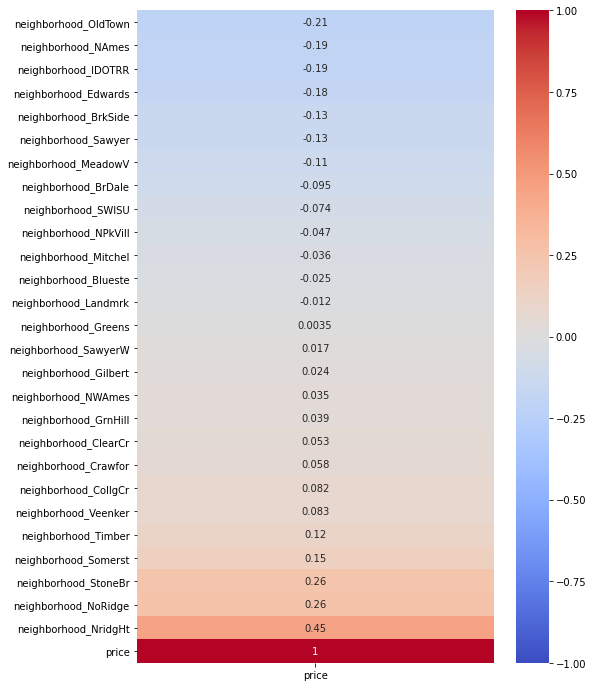

In [13]:
plt.figure(figsize=(8,12))
sns.heatmap(neighb_dummies.corr()[['price']].sort_values('price'),
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1);

# Pre Model

In [14]:
# X = neighb_dummies._get_numeric_data().drop(columns=['price'])
X = neighb_dummies.drop(columns=['price'])
features = list(X.columns)
y = neighb_dummies['price']

In [15]:
#create train test split variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
#instantiate model
lr = LinearRegression()

In [17]:
#Cross-validate
cross_val_score(lr, X_train, y_train).mean()

0.5687165712301556

In [18]:
#fit model
lr.fit(X_train, y_train);

In [19]:
#Score from training data
lr.score(X_train, y_train)

0.5886474831375528

In [20]:
#score from testing data
lr.score(X_test, y_test)

0.5397237045383865

### Must change test set to mirror columns in our model

In [99]:
preds = lr.predict(test(neighb_dummies.drop(columns=['price'])))
preds

TypeError: 'DataFrame' object is not callable

In [21]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [96]:


to_submit = pd.DataFrame()

to_submit['Id'] = test['Id']
to_submit['Price'] = preds

to_submit.head()

ValueError: Length of values does not match length of index

In [101]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
train = pd.DataFrame({'x': ['A', 'B', 'C', 'D']})
test = pd.DataFrame({'x': ['A', 'B', 'D', 'E']})
pd.get_dummies(train)
pd.get_dummies(test)
ohe = OneHotEncoder(sparse=False)
ohe.fit(train)
ohe.transform(train)
ohe.transform(test)

ValueError: Found unknown categories ['E'] in column 0 during transform